In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [ ]:
df= pd.concat([X, y], axis=1)

In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe(include='all')

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df,test_size=0.2,random_state=42)

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>], dtype=object)

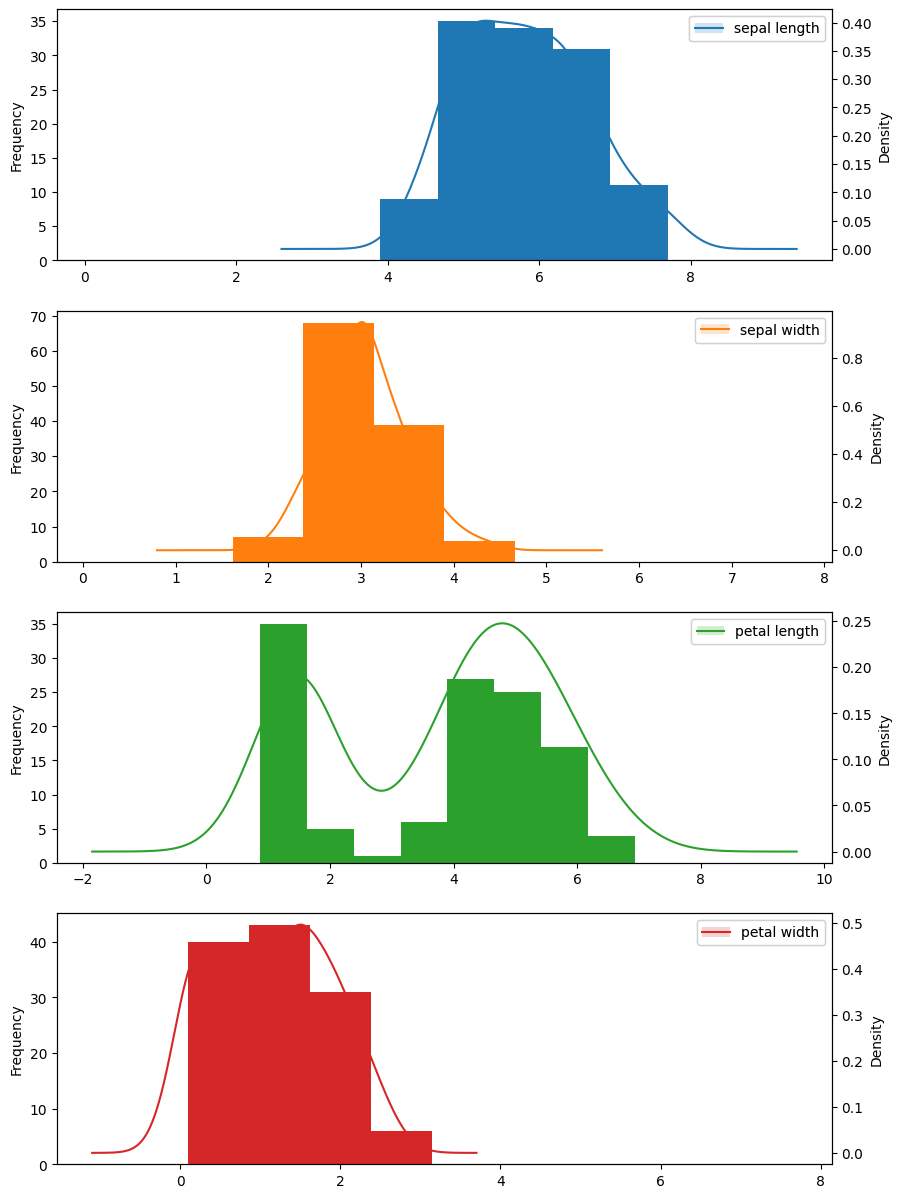

In [ ]:
#Visualization
ax = train_df.plot(kind='hist',subplots=True,figsize=(10,15),sharex=False)
train_df.plot(kind='kde', ax=ax, secondary_y=True,subplots=True)

In [ ]:
train_df["petal length"].max()

6.7

<Axes: ylabel='Density'>

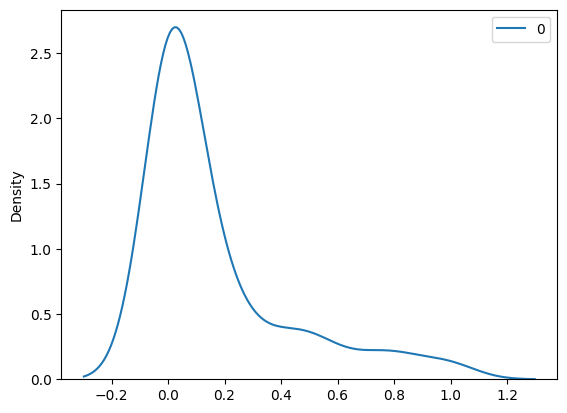

In [ ]:
#Petal_length have two modes so we will aplly radial basis funtion
from sklearn.metrics.pairwise import rbf_kernel
from scipy import stats

med=stats.mode(train_df["petal length"])[0]
med
petal_length_sim_med=rbf_kernel(train_df[["petal length"]],[[6.7]],gamma=0.6)
sns.kdeplot(petal_length_sim_med)

<Axes: >

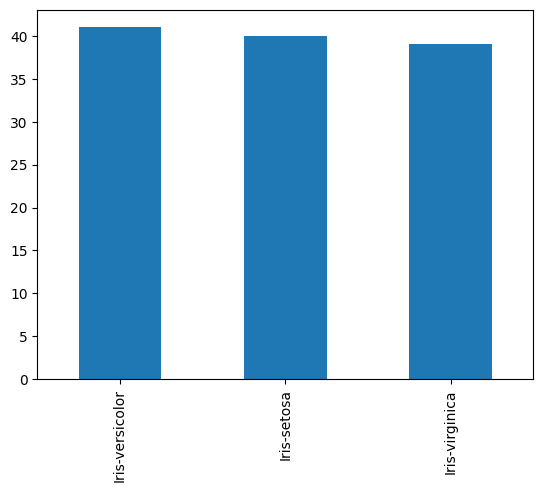

In [ ]:
train_df["class"].value_counts().plot(kind="bar")

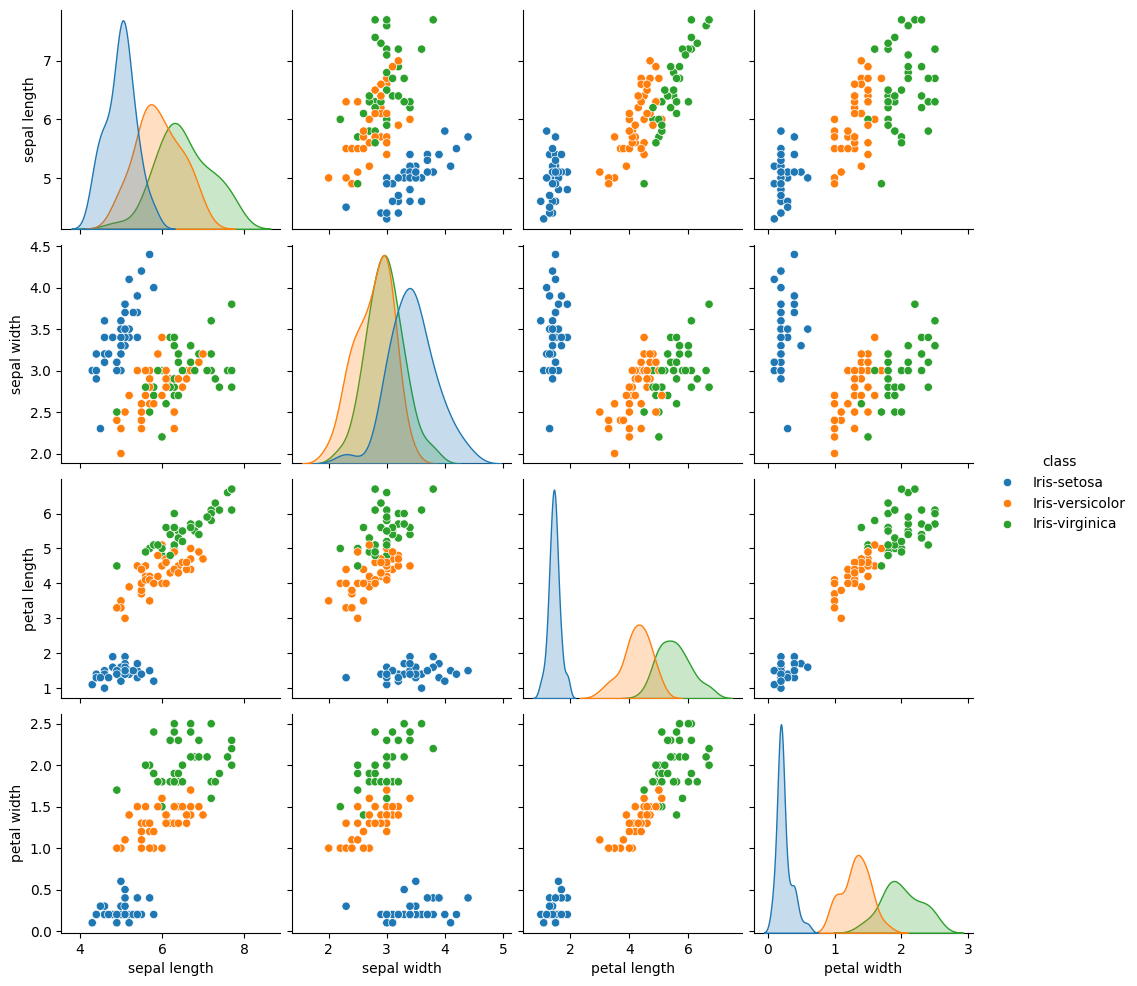

In [ ]:
sns.pairplot(train_df,hue='class')

In [ ]:
train_df.corr()

<ipython-input-62-a7a80d20a44e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.097191,0.862183,0.801485
sepal width,-0.097191,1.000000,-0.422447,-0.357768
petal length,0.862183,-0.422447,1.000000,0.962432
petal width,0.801485,-0.357768,0.962432,1.000000


In [ ]:
train_x,train_y=train_df.drop("class",axis=1),train_df["class"]
test_x,test_y=test_df.drop("class",axis=1),test_df["class"]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
train_y=oe.fit_transform(train_y.values.reshape(-1,1))
test_y=oe.fit_transform(test_y.values.reshape(-1,1))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_x,train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score
y_pred=lr.predict(test_x)
accuracy_score(test_y,y_pred)

1.0

In [ ]:
classification_report(test_y,y_pred)

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00        10\n         1.0       1.00      1.00      1.00         9\n         2.0       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'